Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (7).csv
Dataset Shape: (7043, 21)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingM

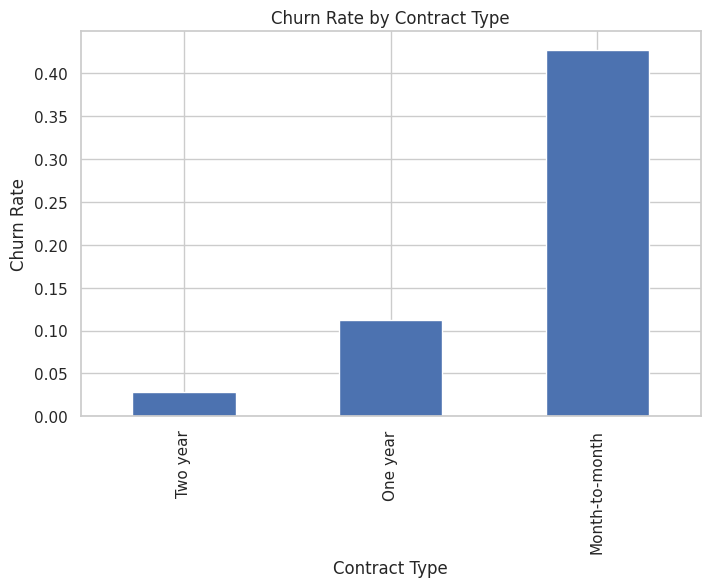


Churn Rate by Contract Type (Bar Chart)
What the Plot Shows:
X-axis: Contract type (Month-to-Month, One-Year, Two-Year)
Y-axis: Average churn rate per contract

What We Observed:
Month-to-month customers churn the most
Long-term contracts have dramatically lower churn

Why This Happens:
No commitment = easy exit
Long-term contracts create switching friction

Business Conclusion:
Contract length is one of the strongest churn drivers.




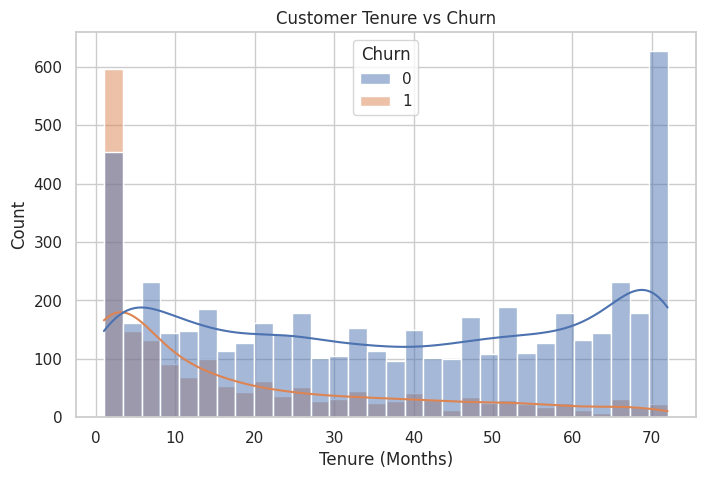


Customer Tenure vs Churn (Histogram)
What the Plot Shows:
X-axis: Customer tenure (months)
Color: Churned vs Non-churned customers

What We Observed:
Churn is heavily concentrated in the first 12 months
Long-tenure customers rarely churn

Why This Happens:
Early customer experience determines loyalty
Poor onboarding = early churn

Business Conclusion:
The first year is the danger zone.




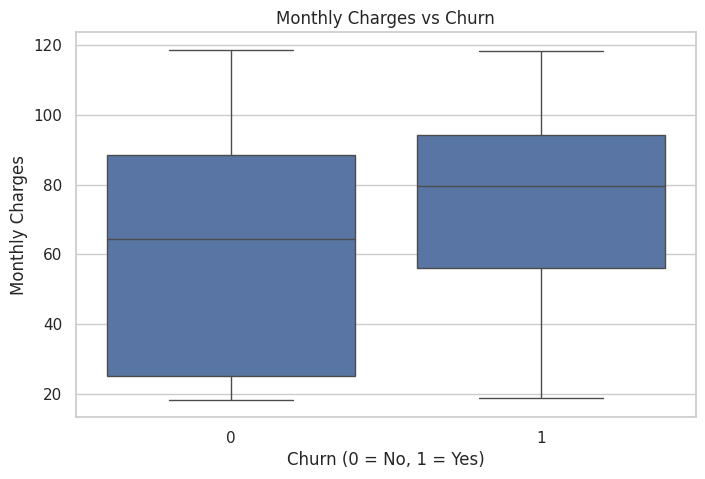


Monthly Charges vs Churn (Box Plot)
What the Plot Shows:
X-axis: Churn (Yes vs No)
Y-axis: Monthly charges
Compares pricing distribution for churned vs retained customers

What We Observed:
Churned customers pay higher monthly charges on average
Retained customers cluster at lower costs

Why This Happens:
High price sensitivity
Customers do not feel they are getting enough value

Business Conclusion:
Price without perceived value drives churn.




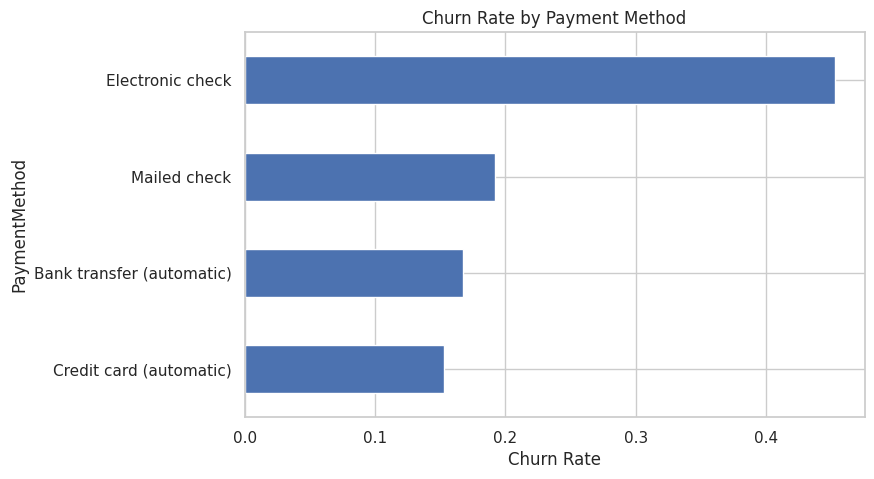


Churn Rate by Payment Method (Horizontal Bar Chart)
What the Plot Shows:
Y-axis: Payment method
X-axis: Churn rate

What We Observed:
Electronic check users churn the most
Auto-payment methods have lower churn

Why This Happens:
Manual payments increase friction
Auto-pay users are more “locked in”

Business Conclusion:
Payment behavior reflects customer commitment.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Cleaned dataset saved and downloaded successfully.


In [17]:
# ================================
# CUSTOMER CHURN ANALYSIS
# End-to-End Data Analyst Project
# ================================

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


# 2. UPLOAD DATASET (USE COLAB UI)
uploaded = files.upload()

# Load the uploaded CSV
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


# 3. INITIAL DATA CHECK
print("Dataset Shape:", df.shape)
print("\nData Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())


# 4. DATA CLEANING

# Convert TotalCharges to numeric (it contains blank spaces)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows with missing values
df.dropna(inplace=True)

# Convert Churn to binary
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Drop customerID (not analytically useful)
df.drop("customerID", axis=1, inplace=True)

print("\nCleaned Dataset Shape:", df.shape)


# 5. OVERALL CHURN RATE
churn_rate = df["Churn"].mean()
print(f"\nOverall Churn Rate: {churn_rate:.2%}")

long_paragraph= """
Overall Churn Rate (Metric, Not a Plot)
What It Is:
The overall churn rate represents the percentage of customers who have left the company.

What We Observed:
The churn rate is roughly 26–27%, meaning about 1 in 4 customers leaves.

Business Conclusion:
Churn is material and financially significant, not noise.
"""
print(long_paragraph)

# 6. CHURN BY CONTRACT TYPE
contract_churn = df.groupby("Contract")["Churn"].mean().sort_values()

contract_churn.plot(kind="bar")
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.show()

long_paragraph1= """
Churn Rate by Contract Type (Bar Chart)
What the Plot Shows:
X-axis: Contract type (Month-to-Month, One-Year, Two-Year)
Y-axis: Average churn rate per contract

What We Observed:
Month-to-month customers churn the most
Long-term contracts have dramatically lower churn

Why This Happens:
No commitment = easy exit
Long-term contracts create switching friction

Business Conclusion:
Contract length is one of the strongest churn drivers.

"""
print(long_paragraph1)


# 7. TENURE VS CHURN
sns.histplot(data=df, x="tenure", hue="Churn", bins=30, kde=True)
plt.title("Customer Tenure vs Churn")
plt.xlabel("Tenure (Months)")
plt.show()

long_paragraph2="""
Customer Tenure vs Churn (Histogram)
What the Plot Shows:
X-axis: Customer tenure (months)
Color: Churned vs Non-churned customers

What We Observed:
Churn is heavily concentrated in the first 12 months
Long-tenure customers rarely churn

Why This Happens:
Early customer experience determines loyalty
Poor onboarding = early churn

Business Conclusion:
The first year is the danger zone.

"""

print(long_paragraph2)

# 8. MONTHLY CHARGES VS CHURN
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges")
plt.show()

long_paragraph3="""
Monthly Charges vs Churn (Box Plot)
What the Plot Shows:
X-axis: Churn (Yes vs No)
Y-axis: Monthly charges
Compares pricing distribution for churned vs retained customers

What We Observed:
Churned customers pay higher monthly charges on average
Retained customers cluster at lower costs

Why This Happens:
High price sensitivity
Customers do not feel they are getting enough value

Business Conclusion:
Price without perceived value drives churn.

"""
print(long_paragraph3)



# 9. PAYMENT METHOD VS CHURN
payment_churn = df.groupby("PaymentMethod")["Churn"].mean().sort_values()

payment_churn.plot(kind="barh")
plt.title("Churn Rate by Payment Method")
plt.xlabel("Churn Rate")
plt.show()

long_paragraph4="""
Churn Rate by Payment Method (Horizontal Bar Chart)
What the Plot Shows:
Y-axis: Payment method
X-axis: Churn rate

What We Observed:
Electronic check users churn the most
Auto-payment methods have lower churn

Why This Happens:
Manual payments increase friction
Auto-pay users are more “locked in”

Business Conclusion:
Payment behavior reflects customer commitment.
"""
print(long_paragraph4)



# 10. SAVE CLEAN DATASET FOR GITHUB & SQL
df.to_csv("cleaned_telco_churn.csv", index=False)
files.download("cleaned_telco_churn.csv")

print("\nCleaned dataset saved and downloaded successfully.")


**FINAL BUSINESS CONCLUSION:**


Customer churn is driven by lack of commitment, early disengagement, and price sensitivity.


Targeted retention strategies focusing on contract upgrades, early-stage experience, and payment optimization can significantly reduce churn.